In [1]:
# CORE LABRARIES USED
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import scikit_learn as sklearn

print('Imported successfully')


Imported successfully


In [5]:
fl=pd.read_csv(r"C:\Users\Danish\Downloads\drug200.csv")
print('Read Data successfully')

Read Data successfully


In [6]:
from imlearn import RandomUnderSampler

ModuleNotFoundError: No module named 'RandomUnderSampler'

In [30]:
fl.select_dtypes(include="object").head()

,Sex,BP,Cholesterol,Drug
0,F,HIGH,HIGH,DrugY
1,M,LOW,HIGH,drugC
2,M,LOW,HIGH,drugC
3,F,NORMAL,HIGH,drugX
4,F,LOW,HIGH,DrugY


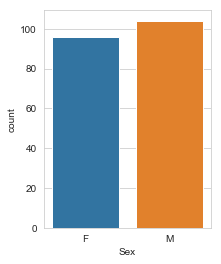

In [31]:
plt.figure(figsize=(3,4))
# plt.title(label=('counts of observations in Sex'))

sns.countplot(fl['Sex'])
# fl["Sex"].value_counts()
plt.show()

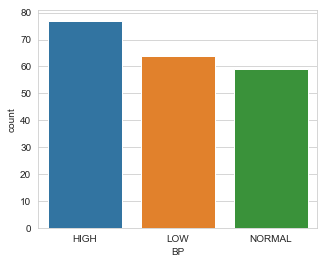

In [32]:
plt.figure(figsize=(5,4))
sns.countplot(fl['BP'])
# plt.title(label="counts of observations in BP")
# fl['BP'].value_counts()
# plt.title=("counter")
plt.show()

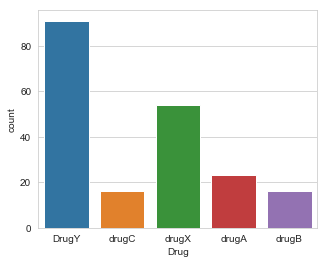

In [33]:
plt.figure(figsize=(5,4))
sns.countplot(fl['Drug'])
# plt.title('counts of observations in DRug')
# fl["Drug"].value_counts()
plt.show()

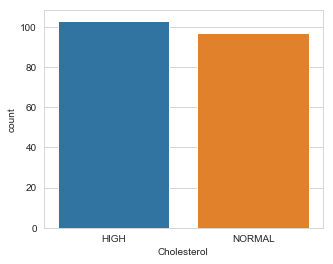

In [34]:
# Cholesterol
plt.figure(figsize=(5,4))
sns.countplot(fl["Cholesterol"])
# plt.title("Counts of Observations in Cholesterol")
# fl["Cholesterol"].value_counts()
plt.show()

In [35]:
fl.select_dtypes(exclude="object").head()

,Age,Na_to_K
0,23,25.355
1,47,13.093
2,47,10.114
3,28,7.798
4,61,18.043


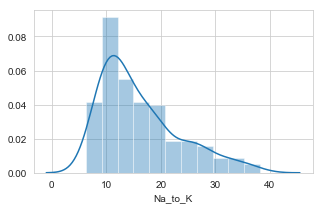

In [36]:

plt.figure(figsize=(5,3))
# plt.title("Distribution of Na_to_K")
sns.distplot(fl["Na_to_K"])
plt.show()

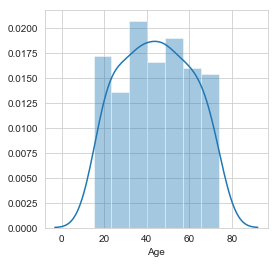

In [37]:
plt.figure(figsize=(4,4))
# plt.title('Age Distribution')
sns.distplot(fl['Age'])
plt.show()

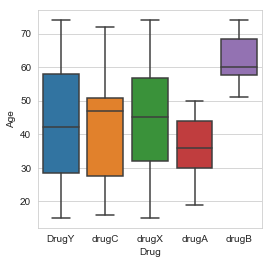

In [38]:
plt.figure(figsize=(4,4))
# plt.title('Observation on Drug with age')
sns.boxplot(x=fl['Drug'],y=fl["Age"])
plt.show()

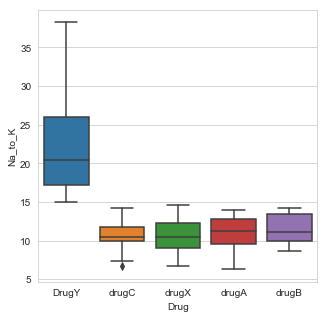

In [39]:
plt.figure(figsize=(5,5))
# plt.title('Observation of Drug with Na_to_K')
sns.boxplot(x=fl['Drug'],y=fl['Na_to_K'])
plt.show()

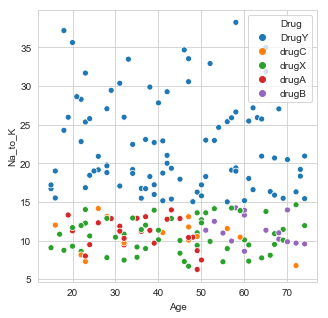

In [40]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=fl['Age'],y=fl['Na_to_K'],hue=fl["Drug"])
# plt.title('Distribution of Age and Na_to_K in scatterplot')
plt.show()

In [63]:
# CASE BASED LABRARIES AND TOOL USED

from sklearn.preprocessing import LabelEncoder #Encoding

from sklearn.model_selection import train_test_split # to split data for test and train

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

    # Simple Encoding using One hot encoding technique

In [64]:
y=fl['Drug']
x=fl.drop(columns=["Drug"])


labelencoder =LabelEncoder()
x['Sex']=labelencoder.fit_transform(x['Sex'])
x['BP']=labelencoder.fit_transform(x['BP'])
x['Cholesterol']=labelencoder.fit_transform(x['Cholesterol'])

# print(x['Sex'].head(),x['BP'].head(),x['Cholesterol'].head())

In [67]:
# spliting data set in to two sets for train and test perpose
X_train,x_test,Y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=50)
print(X_train.shape,Y_train.shape)
print(x_test.shape,y_test.shape)

(160, 5) (160,)
(40, 5) (40,)


In [44]:


neigh = KNeighborsClassifier(n_neighbors=3)
x=neigh.fit(X_train,Y_train)

# print(neigh.score(x_test[:10],y_test[:10])*100) # To print the score 
# print(neigh.predict(x_test[:5]))   # to Predict directly Drug

# print(len(x_test))

#Simple cross Validation

In [45]:
XX_train,x_cv,YY_train,y_cv=train_test_split(X_train,Y_train,test_size=0.20,random_state=50)
vi=[]
error=[]
accuracy=[]
for i in range(1,33,2):
    nei = KNeighborsClassifier(n_neighbors=i)
    nei.fit(x_cv,y_cv)
    pred = nei.predict(x_cv)
    acc = accuracy_score(y_cv,pred,normalize=True)
    vi.append(i)
    error.append(1-acc)
    accuracy.append(acc)


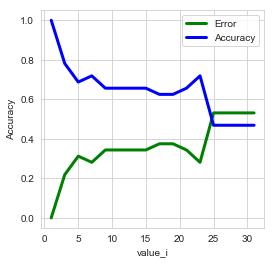

1


In [46]:
# dring the accuracy curve and the error curve
fig_err = pd.DataFrame({"value_i":vi,"Error":error,"Accuracy":accuracy})

plt.figure(figsize=(4,4))
sns.set_style('whitegrid')
sns.lineplot(y=fig_err['Error'],x=fig_err["value_i"],lw=3,label="Error",color="Green")
sns.lineplot(y=fig_err['Accuracy'],x=fig_err["value_i"],lw=3,label="Accuracy",color="blue")

plt.show()
optimal_k=vi[error.index(min(error))]
print(optimal_k)

In [47]:
from sklearn.metrics import confusion_matrix,classification_report
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(XX_train,YY_train)
pred = knn.predict(x_test)
acc = accuracy_score(y_test,pred,normalize=True)*float(100)
print("\n****Test accuracy for k = 3 is %d%%" % (acc))

y_pred=nei.predict(x_test)
print(classification_report(y_test,pred))



****Test accuracy for k = 3 is 57%
              precision    recall  f1-score   support

       DrugY       0.94      0.89      0.91        18
       drugA       0.14      0.25      0.18         4
       drugB       0.00      0.00      0.00         4
       drugC       0.00      0.00      0.00         2
       drugX       0.43      0.50      0.46        12

   micro avg       0.57      0.57      0.57        40
   macro avg       0.30      0.33      0.31        40
weighted avg       0.57      0.57      0.57        40



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [68]:
# # spliting data set in to two sets for train and test perpose
# X_train,x_test,Y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=50)
# print(X_train.shape,Y_train.shape)
# print(x_test.shape,y_test.shape)
# # 
# # data is splited in to 80/20 

# X_train,x_test,Y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=50)
# print(X_train.shape,Y_train.shape)
# print(x_test.shape,y_test.shape)

(160, 5) (160,)
(40, 5) (40,)


In [69]:
# from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv_score=[]
val_k=[]
mse=[]
for k in range(1,41,2):
    knn1=KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn1,X_train,Y_train,cv=10,scoring="accuracy")
    cv_score.append(scores.mean())
    val_k.append(k)
mse = [1-i for i in cv_score]


# # from sklearn.metrics import confusion_matrix,classification_report
knn = KNeighborsClassifier(n_neighbors=9)
# knn.fit(XX_train,YY_train)
# pred = knn.predict(x_test)
# acc = accuracy_score(y_test,pred,normalize=True)*float(100)
# print("\n****Test accuracy for k = 3 is %d%%" % (acc))

# y_pred=nei.predict(x_test)
# print(classification_report(y_test,pred))


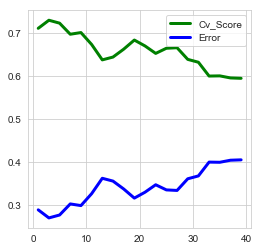

3


In [70]:
# dring the accuracy curve and the error curve
plt.figure(figsize=(4,4))
sns.set_style('whitegrid')
sns.lineplot(y=cv_score,x=val_k,lw=3,label="Cv_Score",color="Green")
sns.lineplot(y=mse,x=val_k,lw=3,label="Error",color="blue")

plt.show()

optimal_k=val_k[mse.index(min(mse))]
print(optimal_k)

In [71]:
knn_optimal = KNeighborsClassifier(n_neighbors=9)
knn_optimal.fit(X_train,Y_train)
pred = knn_optimal.predict(x_test)
accr = accuracy_score(y_test,pred)*100
print(accr)

62.5


In [73]:
# My Data set is imbalanced to make it balanced we use some techniques
x['Sex'].value_counts()

1    104
0     96
Name: Sex, dtype: int64